## Trading Idea 1: Long Crack Spread, Short Refiner Stock
Composition of the Crack Spread:
The crack spread typically involves a combination of crude oil futures (input) and the refined product futures like gasoline and heating oil (outputs). A common crack spread is the 3:2:1 crack spread, which means buying three crude oil contracts and selling two gasoline contracts and one heating oil contract.

#### How to Trade Against a Refiner Stock:
In this trade, you would go long on the 3:2:1 crack spread while simultaneously shorting a refiner stock such as Valero Energy Corporation (VLO).

#### Economic Rationale:
Refiners profit from the difference between the cost of crude oil and the price of refined products. When the crack spread widens (indicating higher refinery margins), refiner stocks tend to benefit, and vice versa. This relationship creates an arbitrage opportunity: if the crack spread is expected to widen, refiner stocks should rise, and if it is expected to narrow, refiner stocks should fall.

#### Trade Description:
- Long 3 Crude Oil Futures (CL)
- Short 2 Gasoline Futures (RB)
- Short 1 Heating Oil Futures (HO)
- Short Valero Energy Corporation (VLO) Stock

In [15]:
# Assign futures tickers and refiner ticker
cl_ticker = "CL=F"
rb_ticker = "RB=F"
ho_ticker = "HO=F"
refiner_ticker = "VLO"

In [16]:
# Set start and end date
start_date = "2021-01-01"
end_date = "2022-12-31"

In [13]:
# Set rolling window for zscore
window = 22

In [19]:
import yfinance as yf
import numpy as np

df = yf.download(tickers=[cl_ticker, rb_ticker, ho_ticker, refiner_ticker], start= start_date, end=end_date)["Adj Close"]
df

[*********************100%%**********************]  4 of 4 completed


Ticker,CL=F,HO=F,RB=F,VLO
Date,,,,
2021-01-04,47.619999,1.4620,1.3729,48.594181
2021-01-05,49.930000,1.5189,1.4521,49.980595
2021-01-06,50.630001,1.5287,1.4750,51.096699
2021-01-07,50.830002,1.5381,1.4827,52.029694
2021-01-08,52.240002,1.5795,1.5423,50.320660
...,...,...,...,...
2022-12-23,79.559998,3.2661,2.3836,118.661598
2022-12-27,79.529999,3.3537,2.3602,120.607971
2022-12-28,78.959999,3.3778,2.3629,119.596619


## Setup Strategy

Construct crack spread which is defined by long 3 crude oil contract, short 2 gasoline contract and short 1 heating oil contract.

In [20]:
# Construct the crack portfolio
df["crack"] = (3*df[cl_ticker] - 2*df[rb_ticker] - df[ho_ticker])

# Create the crack spread
df["spread"] = df["crack"] - df[refiner_ticker]

# Compute the returns of each position
df["returns"] = df.spread.apply(np.log).diff(1)

In [25]:
df.head()

Ticker,CL=F,HO=F,RB=F,VLO,crack,spread,returns
Date,,,,,,,
2021-01-04,47.619999,1.4620,1.3729,48.594181,138.652197,90.058016,NaN
2021-01-05,49.930000,1.5189,1.4521,49.980595,145.366901,95.386306,0.057481
2021-01-06,50.630001,1.5287,1.4750,51.096699,147.411303,96.314604,0.009685
2021-01-07,50.830002,1.5381,1.4827,52.029694,147.986506,95.956812,-0.003722
2021-01-08,52.240002,1.5795,1.5423,50.320660,152.055905,101.735245,0.058476


In [26]:
# Compute rolling zscore between crack and refiner
df["z"] = (df.spread - df.spread.rolling(window=window).mean()) / df.spread.rolling(window=window).std()

In [33]:
# Create a position indicator to short the spread if it increases above 2 standard deviations
condition_list = [df.z < -1.5, df.z > 1.5]
choice_list = [1, -1]
default = 0
df["position"] = np.select(condition_list, choice_list, default)
df

Ticker,CL=F,HO=F,RB=F,VLO,crack,spread,returns,z,position
Date,,,,,,,,,
2021-01-04,47.619999,1.4620,1.3729,48.594181,138.652197,90.058016,NaN,NaN,0
2021-01-05,49.930000,1.5189,1.4521,49.980595,145.366901,95.386306,0.057481,NaN,0
2021-01-06,50.630001,1.5287,1.4750,51.096699,147.411303,96.314604,0.009685,NaN,0
2021-01-07,50.830002,1.5381,1.4827,52.029694,147.986506,95.956812,-0.003722,NaN,0
2021-01-08,52.240002,1.5795,1.5423,50.320660,152.055905,101.735245,0.058476,NaN,0
...,...,...,...,...,...,...,...,...,...
2022-12-23,79.559998,3.2661,2.3836,118.661598,230.646693,111.985095,0.011439,1.361834,0
2022-12-27,79.529999,3.3537,2.3602,120.607971,230.515897,109.907925,-0.018723,0.974720,0
2022-12-28,78.959999,3.3778,2.3629,119.596619,228.776397,109.179779,-0.006647,0.818499,0


In [35]:
strategy_returns = df.position.shift(1) * df.returns
strategy_returns[]

Date
2021-01-04    NaN
2021-01-05    0.0
2021-01-06    0.0
2021-01-07   -0.0
2021-01-08    0.0
             ... 
2022-12-23    0.0
2022-12-27   -0.0
2022-12-28   -0.0
2022-12-29   -0.0
2022-12-30    0.0
Length: 503, dtype: float64

In [36]:
def calculate_cumulative_returns(returns):
    cumulative_returns = (1 + returns).cumprod() - 1
    return cumulative_returns

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)  # Assuming 252 trading days in a year
    return sharpe_ratio_annualized

def calculate_drawdown(returns):
    cumulative_returns = calculate_cumulative_returns(returns)
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

Cumulative Returns:
 Date
2022-12-23    1.037348
2022-12-27    1.037348
2022-12-28    1.037348
2022-12-29    1.037348
2022-12-30    1.037348
dtype: float64

Sharpe Ratio: 1.2941901873606758

Drawdown: Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2022-12-23   -0.349189
2022-12-27   -0.349189
2022-12-28   -0.349189
2022-12-29   -0.349189
2022-12-30   -0.349189
Length: 503, dtype: float64


Text(0.5, 1.0, 'Cumulative Returns')

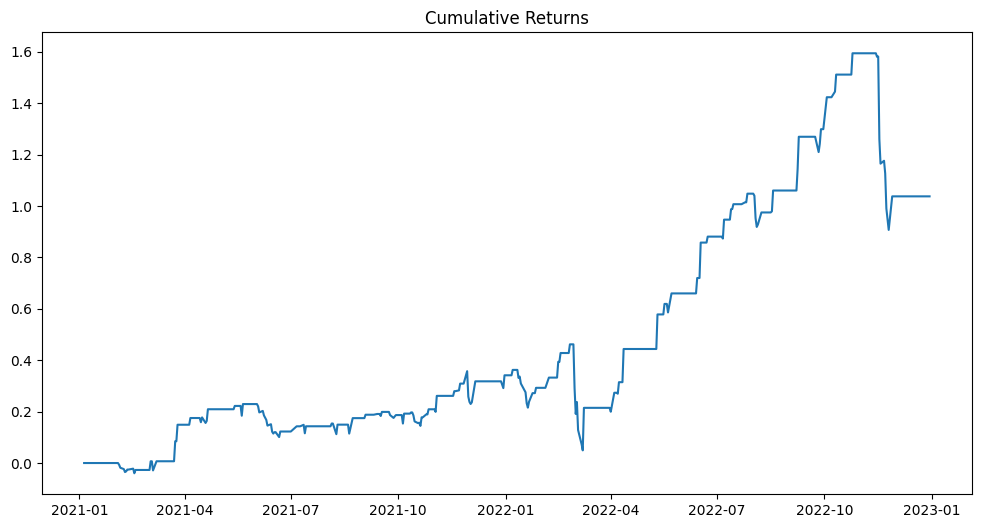

In [39]:
# Calculate metrics
cumulative_returns = calculate_cumulative_returns(strategy_returns)
sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
drawdown, max_drawdown = calculate_drawdown(strategy_returns)

# Print results
print("Cumulative Returns:\n", cumulative_returns.tail())
print("\nSharpe Ratio:", sharpe_ratio)
print("\nDrawdown:", drawdown)

# Plotting for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns')